# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:

* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create Circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=69)

In [ ]:
# Check out the features
X

array([[-0.51839217, -0.66522091],
       [ 0.78398275, -0.00098577],
       [ 0.12616247, -0.75963138],
       ...,
       [ 0.72246395, -0.26885848],
       [-0.848932  ,  0.5415319 ],
       [ 0.80941654,  0.6245457 ]])

In [ ]:
# Change the labels
y[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

Our data is a little hard to understand right now... let's visualize it!

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,-0.518392,-0.665221,1
1,0.783983,-0.000986,1
2,0.126162,-0.759631,1
3,-0.703845,-0.327170,1
4,0.675245,-0.347853,1
...,...,...,...
995,0.234010,0.725191,1
996,0.032406,0.785927,1
997,0.722464,-0.268858,1
998,-0.848932,0.541532,0


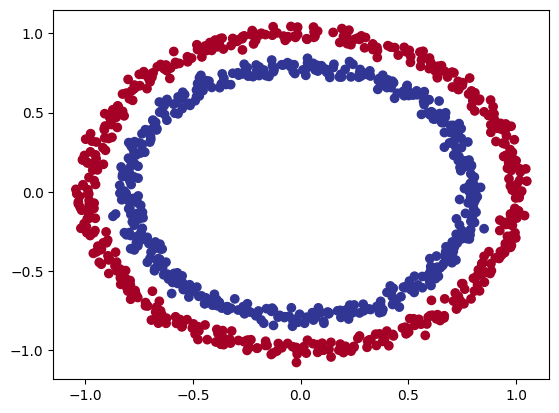

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output Shapes

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([-0.51839217, -0.66522091]), 1)

## Steps in modeling

The steps in modeling with TensorFlow are typically:
1. Create or import a model
2. Compile a model
3. Fit a model
4. Evaluate a model
5. Tweak a model (hyperparameter tuning)
6. Save and export a model

In [ ]:
import tensorflow as tf
# Set the ranom seed
tf.random.set_seed(69)

# 1. Create the model using the sequential api
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 1.3497 - accuracy: 0.4894
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.4984
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7018 - accuracy: 0.4972
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5004
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.4962


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(tf.expand_dims(X, axis=-1), y, epochs=200, verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6934 - accuracy: 0.5000


[0.6934084296226501, 0.5]

Since we're working on a binary classification problem and our model is getting around -50% accuracy... it's performing as if it's guessing randomly.

So let's step things up a notch by adding an extra layer.

In [ ]:
# Set the random seed
tf.random.set_seed(69)

# 1. Create the model , this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 2.1047 - accuracy: 0.4821
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7046 - accuracy: 0.4995
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4994
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4875
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4779
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4915
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4949
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4824
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4873
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.4924
Epoch 11/

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might change the optimization function or the loss function.
3. Fitting a model - here we might fit a model for more epochs (leave it training for longer).



In [ ]:
# Set the random seed
tf.random.set_seed(69)

# 1. Create the model (this time with 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10),  # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.8358 - accuracy: 0.4975
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7041 - accuracy: 0.4943
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.4965
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4803
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6962 - accuracy: 0.4933
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.4887
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5007
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6952 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4868
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6959 - accuracy: 0.5183
Epoch 11/

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing multiclass classification


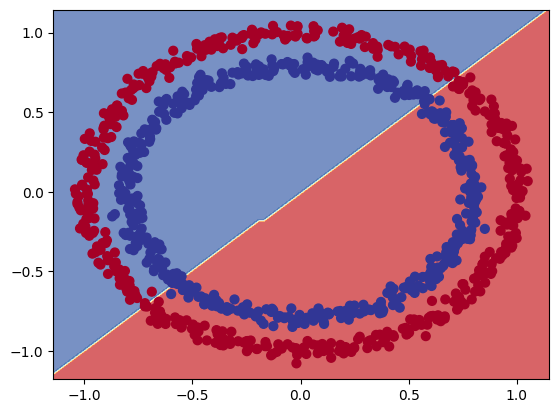

In [ ]:
# Check out the decisions our model is making
plot_decision_boundary(model= model_3, X=X, y=y)

🔑**Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of , remember these 3 words : **visualize, visualize, visualize**. Inspect your data, inspect your model, inspect your model's predictions.

To visualise our model's predictions, let's create a function `plot_decision_boundary()`, this function will:
 1. Take in a trained model, features (X) and labels (y)
 2. Create a meshgrid of the different X values
 3. Make predictions across the meshgrid
 4. Plot the predictions as well as a line between zones (where each unique class falls)

In [ ]:
# Let's see if our model can be used for a regression problem

tf.random.set_seed(69)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our data into training and test data
# Here X and y both contain 200 elements , so we're training on 150 of them , and testing on the rest of 50
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# Making a regression model for our newly created data
tf.random.set_seed(69)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 362.5359 - mae: 362.5359
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 235.0576 - mae: 235.0576
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 100.9261 - mae: 100.9261
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 59.6057 - mae: 59.6057
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 86.5450 - mae: 86.5450
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 63.3729 - mae: 63.3729
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 44.2042 - mae: 44.2042
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0020 - mae: 47.0020
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 45.1262 - mae: 45.1262
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 46.1273 - mae: 46.1273
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 7ms/step


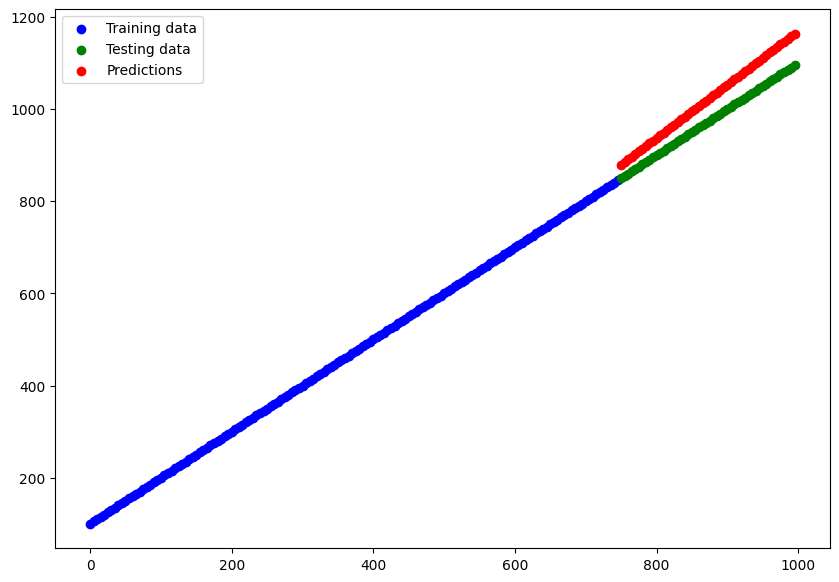

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Testing data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

### There is a missing piece in our data or modelling , referred to as Non-Linearity where our data is not linear (like a straight line) as a result of this , we are not able to build a classification model on this data as of now

In [ ]:
# Set the random seed
tf.random.set_seed(69)

# Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3772 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2317 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2364 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1904 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1414 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1145 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0606 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0507 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9884 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9289 - accuracy: 0.5000
Epoch 11/

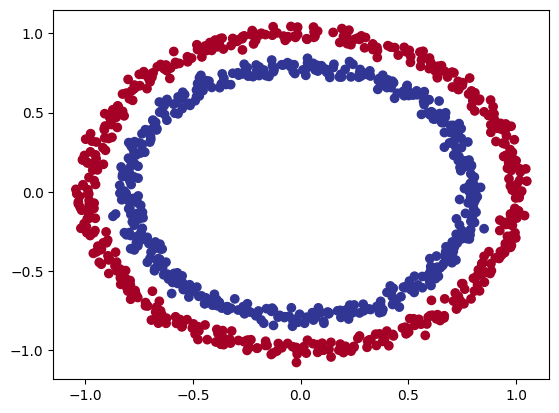

In [ ]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


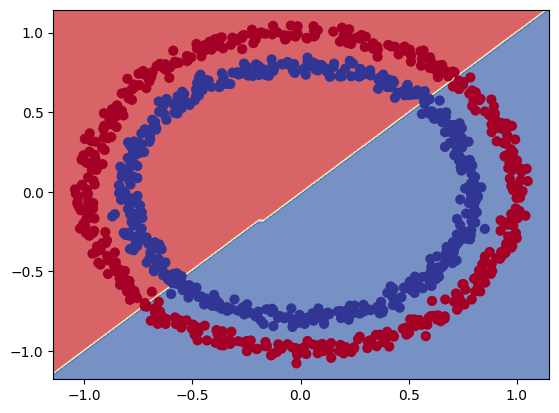

In [ ]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [ ]:
# Set the random seed
tf.random.set_seed(69)

# Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_6.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.4537 - accuracy: 0.5017
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.4149 - accuracy: 0.5003
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3774 - accuracy: 0.4988
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3926 - accuracy: 0.4974
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3733 - accuracy: 0.4964
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3438 - accuracy: 0.4987
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3574 - accuracy: 0.4973
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3122 - accuracy: 0.5007
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2668 - accuracy: 0.4997
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2493 - accuracy: 0.4978
Epoch 11/

In [ ]:
# Time to replicate the multi-layer neural network from TensorFlow playgroung to code

tf.random.set_seed(69)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(tf.expand_dims(X, axis=-1), y, epochs=300)

Epoch 1/300
32/32 [==============================] - 1s 3ms/step - loss: 3.5338 - accuracy: 0.5000
Epoch 2/300
32/32 [==============================] - 0s 3ms/step - loss: 1.2386 - accuracy: 0.5000
Epoch 3/300
32/32 [==============================] - 0s 3ms/step - loss: 1.0937 - accuracy: 0.5000
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 1.0193 - accuracy: 0.5000
Epoch 5/300
32/32 [==============================] - 0s 3ms/step - loss: 0.9593 - accuracy: 0.5000
Epoch 6/300
32/32 [==============================] - 0s 3ms/step - loss: 0.9091 - accuracy: 0.5000
Epoch 7/300
32/32 [==============================] - 0s 3ms/step - loss: 0.8682 - accuracy: 0.5000
Epoch 8/300
32/32 [==============================] - 0s 3ms/step - loss: 0.8329 - accuracy: 0.5000
Epoch 9/300
32/32 [==============================] - 0s 3ms/step - loss: 0.8061 - accuracy: 0.5000
Epoch 10/300
32/32 [==============================] - 0s 3ms/step - loss: 0.7856 - accuracy: 0.4986
Epoch 11/

313/313 [==============================] - 1s 1ms/step
doing multiclass classification


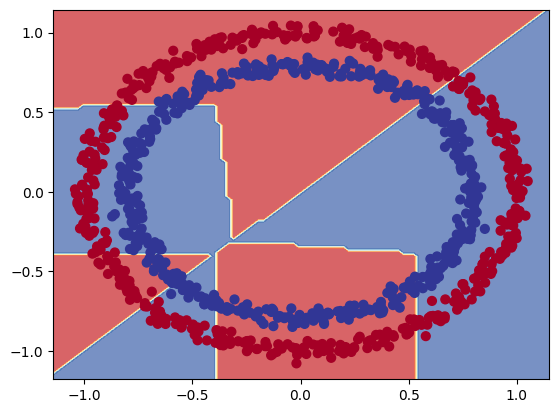

In [ ]:
# Howe do our model's prediction look ?
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

In [ ]:
# Let's model this once and for all ( adding an activation function in the output layer)
tf.random.set_seed(69)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid"),
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.4950
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5160
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5190
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5290
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5200
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6829 - accuracy: 0.5210
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5260
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5390
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5370
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5440
Epoch 11/

In [ ]:
# Evaluate our model
model_8.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.3900 - accuracy: 0.8740


[0.3899833559989929, 0.8740000128746033]

313/313 [==============================] - 1s 2ms/step
doing binary classification


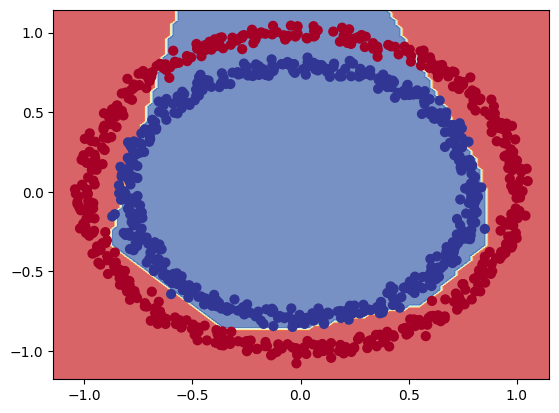

In [ ]:
# Let's visualize our metrics
plot_decision_boundary(model=model_8,
                       X=X,
                       y=y)

🤔**Question:** What's wrong with the predictions we've made ? Are we really evaluating our model correctly ? Hint : What data did the model learn on and what data did we predict on ?

The answer to this would be , we cannot say that our model has learnt properly because it has predicted on the same data that it has trained on.

🔑**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concepts of linear and non-linear functions (or lines), let's see them in action.

In [ ]:
# Create a toy tensor (similar to the data we pass to our tensors)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

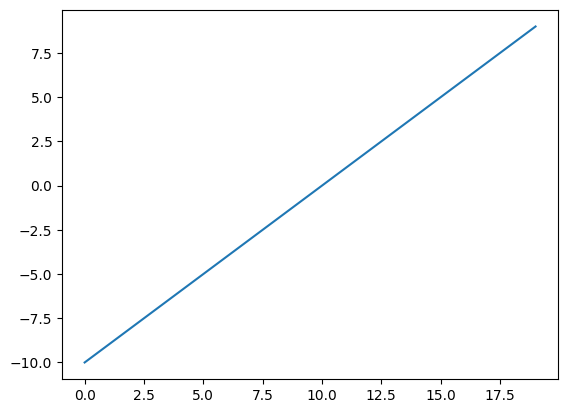

In [ ]:
# Visualize our toy tensor
plt.plot(A);

In [ ]:
# Let's start by replicating sigmoid - sigmoid (x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sig_A = sigmoid(A)
sig_A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

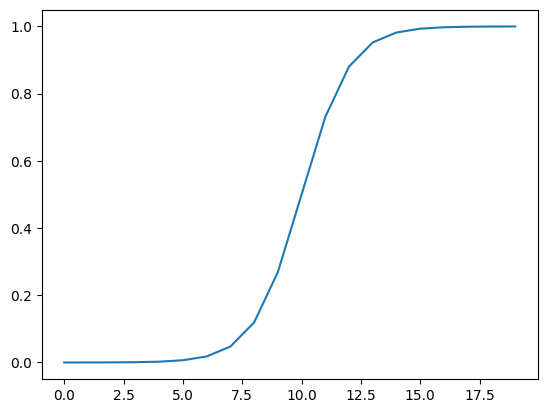

In [ ]:
# Let's plot the sigmoid of A
plt.plot(sig_A);

In [ ]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to relu function
relu_A = relu(A)
relu_A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

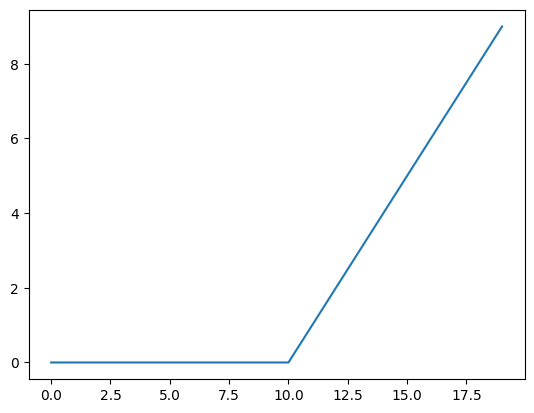

In [ ]:
# Let's plot the relu function
plt.plot(relu_A);

In [ ]:
# The 'linear' activation function does nothing , takes in a tensor and returns it unchanged
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

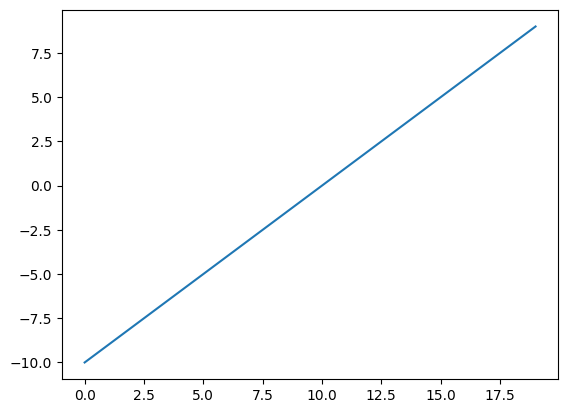

In [ ]:
# Let's plot it anyways
plt.plot(tf.keras.activations.linear(A));

## Evaluating and Improving our classification

So far we've been training and testing on the same dataset...

However in machine learning , this is basically a sin .

So let's create training and test set.

In [ ]:
# Check how many examples we have
len(X), len(y)

(1000, 1000)

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
tf.random.set_seed(69)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
# Let's recreate the model to fit the model on the training data and test it on the test data
tf.random.set_seed(69)

# Creating the model
rad_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

# Compiling the model
rad_model.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics=["accuracy"])

# Fitting the model
history = rad_model.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6968 - accuracy: 0.4850
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6924 - accuracy: 0.5038
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.5013
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5125
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5088
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.5150
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.5175
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5325
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5362
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6767 - accuracy: 0.5387
Epoch 11/25
25/25 [

In [ ]:
# Let's check our predictions and evaluate our model
y_preds = rad_model.predict(X_test)
rad_model.evaluate(X_test,y_test), y_preds[:5], y_test[:5]

7/7 [==============================] - 0s 2ms/step - loss: 0.3191 - accuracy: 0.8700


([0.31907331943511963, 0.8700000047683716],
 array([[0.71571046],
        [0.8575748 ],
        [0.7860739 ],
        [0.1598358 ],
        [0.76968867]], dtype=float32),
 array([1, 1, 1, 0, 1]))

313/313 [==============================] - 0s 1ms/step
doing binary classification


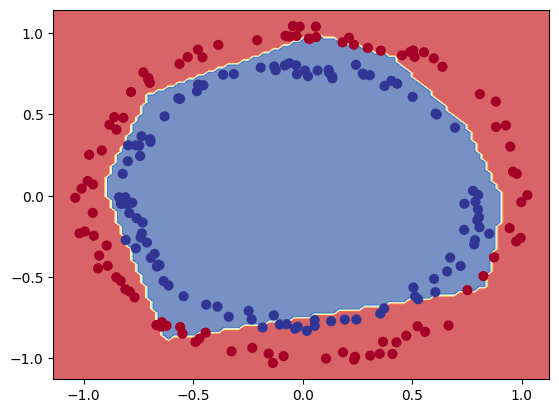

In [ ]:
# Let's plot our model
plot_decision_boundary(model = rad_model,
                       X= X_test,
                       y= y_test)

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


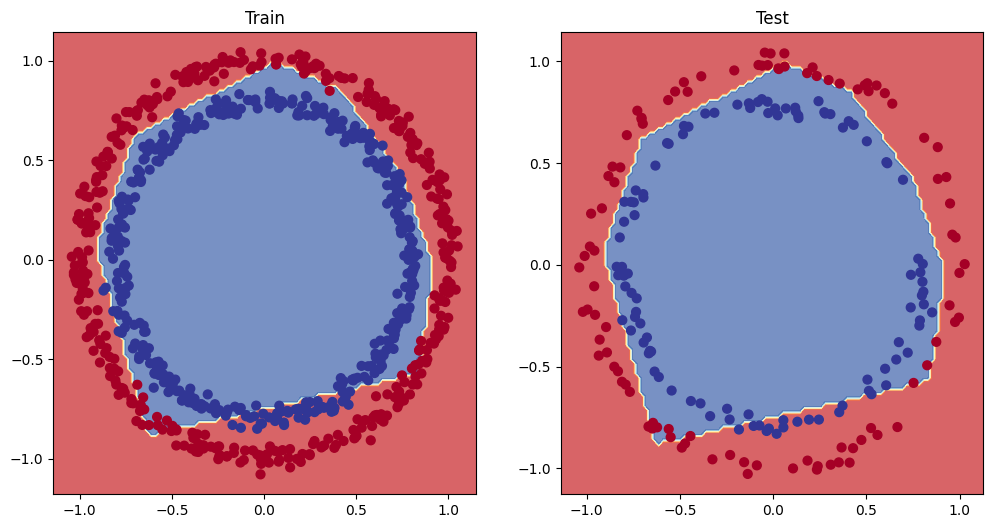

In [ ]:
# Plotting the decision boundaries for both the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model = rad_model,
                       X= X_train,
                       y= y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model = rad_model,
                       X= X_test,
                       y= y_test)
plt.show();

## Plot the loss (or training) curves

In [ ]:
# Convert the history object into a dataframe
pd.DataFrame(history.history)

,loss,accuracy
0,0.696753,0.48500
1,0.692441,0.50375
2,0.691341,0.50125
3,0.688938,0.51250
4,0.688206,0.50875
5,0.686663,0.51500
6,0.685245,0.51750
7,0.682608,0.53250
8,0.680167,0.53625
9,0.676672,0.53875


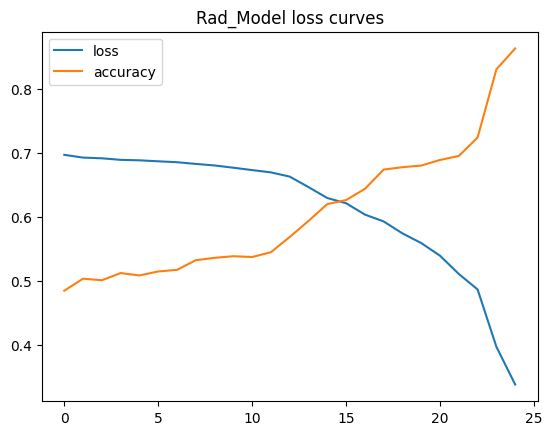

In [ ]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Rad_Model loss curves");

🔑**Note:** For many problems, the loss function going down means the model is improving ( the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality , you can add to your model while it's training.
* Another model (we could use the same one as above , but we're practicing building models here)
* A modified loss curves plot.

In [ ]:
# Set random seed
tf.random.set_seed(69)

# Creating our model
rad_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

# Compiling the model
rad_model_2.compile(loss="binary_crossentropy",
                    optimizer="Adam",
                    metrics=["accuracy"])

# Creating a learning rate callback ( Note that, this has to exist before fitting the model)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fitting the model (passing the learning rate callback)
history_rad_model_2 = rad_model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.8020 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7991 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7957 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7922 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7884 - accuracy: 0.4963 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7842 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7798 - accuracy: 0.4787 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7754 - accuracy: 0.4450 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

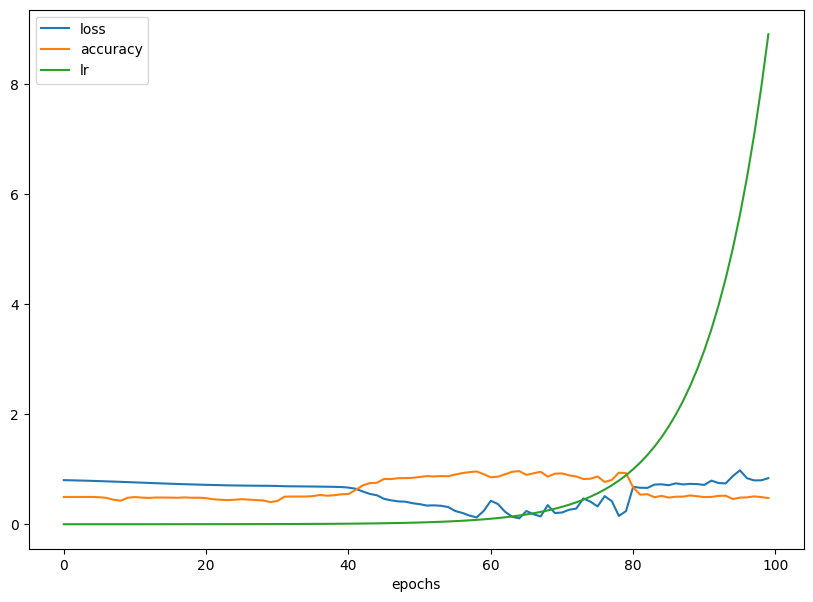

In [ ]:
# Checkout the history
pd.DataFrame(history_rad_model_2.history).plot(figsize=(10,7), xlabel="epochs");

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10**(tf.range(100)/20)) # This array depicts the learning rate of the model from start till the end of epoch
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_rad_model_2.history["loss"]) # This plots the learning rate on the x-axis and the loss on the y-axis
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [ ]:
# Example of other typical learning rates values :
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model
tf.random.set_seed(69)

# Creating the model
rad_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(4, activation ="relu"),
    tf.keras.layers.Dense(1, activation ="sigmoid")
])

# Compiling the model
rad_model_3.compile(loss="binary_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                  metrics=["accuracy"])

# Fitting the model with less epochs
history_rad_model_3 = rad_model_3.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 2ms/step - loss: 0.7014 - accuracy: 0.4663
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5100
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6868 - accuracy: 0.5888
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5537
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6487 - accuracy: 0.6025
Epoch 6/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6173 - accuracy: 0.6200
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.6888
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7250
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.8062
Epoch 10/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.8413
Epoch 11/20
25/25 [

In [ ]:
# Evaluate the model on test data set
rad_model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1293 - accuracy: 0.9750


[0.12932857871055603, 0.9750000238418579]

313/313 [==============================] - 1s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


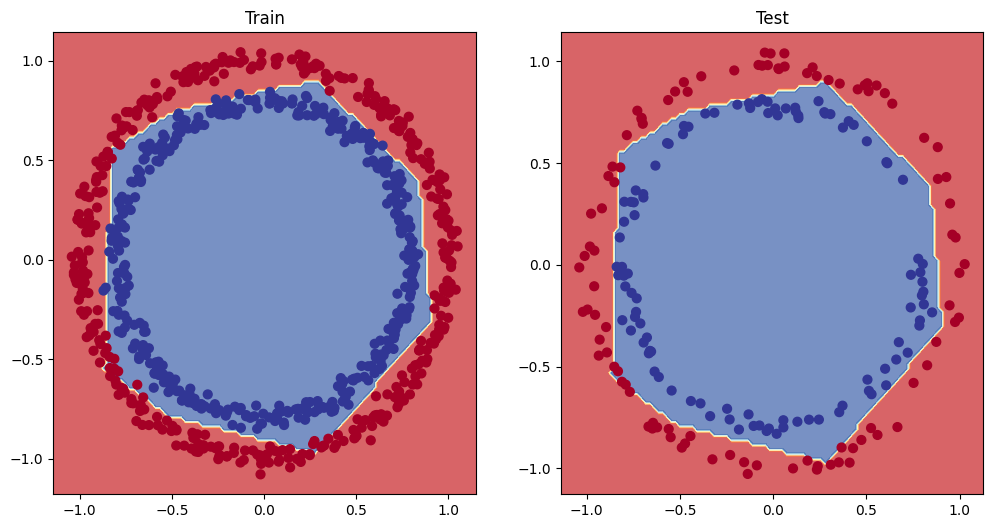

In [ ]:
# Plot the decision boundary for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model = rad_model_3,
                       X= X_train,
                       y= y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model = rad_model_3,
                       X= X_test,
                       y= y_test)
plt.show();

## More classification evaluation methods

Alongside visualizing our models results as much as possible , there are a handful of other classification evaluation methods and metrics you should be familiar with :
* accuracy
* precision
* recall
* f1-score
* confusion matrix
* classification report (from scikit-learn)

In [ ]:
# Check the accuracy of our model
loss, accuracy = rad_model_3.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy * 100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.1293 - accuracy: 0.9750
Model loss on the test set: 0.12932857871055603
Model accuracy on the test set: 97.50%


In [ ]:
# Create a confusion matrix
'''
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = rad_model_3.predict(X_test)

# Create a confusion matrix
confusion_matrix(y_test, y_preds)
'''

'\nfrom sklearn.metrics import confusion_matrix\n\n# Make predictions\ny_preds = rad_model_3.predict(X_test)\n\n# Create a confusion matrix \nconfusion_matrix(y_test, y_preds)\n'

Looks like our predictions array has come out in prediction probability form... the standard output from the sigmoid activation function.

In [ ]:
# Convert the prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Create the confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[ 92,   5],
       [  0, 103]])

How about we prettify our confusion matrix ?

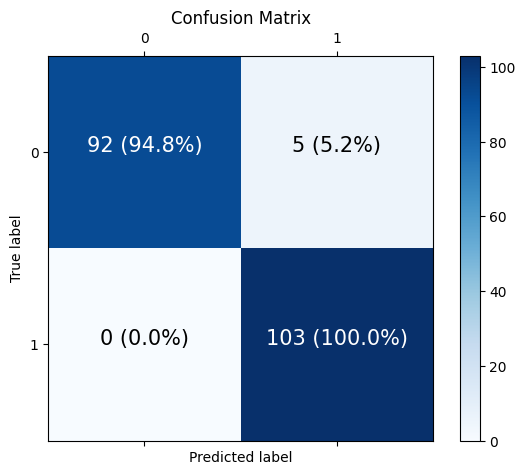

In [ ]:
# Note : The confusion matrix code we are about to write is a remix of scikit-learns's plot_confusion_matrix
# function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

import itertools

figsize = (10,10)

# Create the confusion Matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalise our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=(7,5))
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set threshold for different colours
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

# Working with a larger example (multiclass classification)

When you have more than two classes as an option , it is known as a **mutli-class classification** problem.
* This means if you have 3 different classes , it's a multi-class classification.
* This also means if you have 100 different classes , it's a multi-class classification.

To practice multi-class classification , we're going to build a neural network to classifiy images of different items of clothing.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
# Now we are extracting the training & test data from the dataset and loading it into seperate tuples
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Let's check the shape of a simgle example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

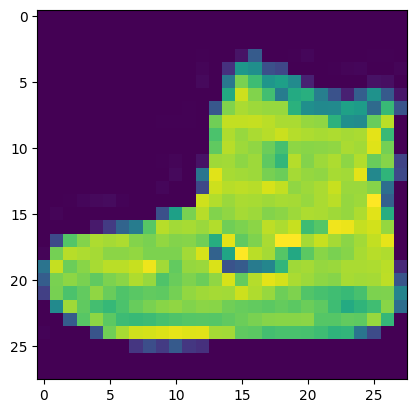

In [ ]:
# Plot (show the image of a single example)
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Check our samples label
train_labels[0]

9

In [ ]:
# Creating a small list so we can index onto our training labels to make it human readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
len(class_names)

10

Text(0.5, 1.0, 'Sandal')

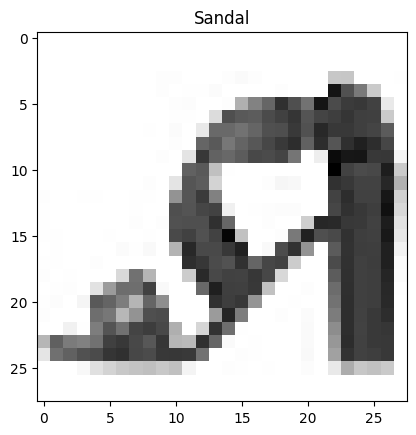

In [ ]:
# Plot an example image
plt.imshow(train_data[213], cmap=plt.cm.binary)
plt.title(class_names[train_labels[213]])

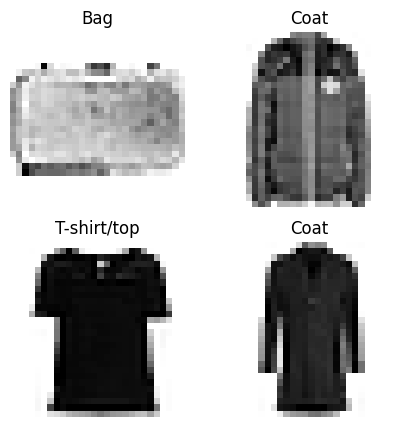

In [ ]:
# Plot multiple random images
import random
plt.figure(figsize=(5,5))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a multi-class classification model

For our multi-class classification model , we can use a similar architecture to our binary classifiers , however we're going to tweak a few things:      
* Input Shape = 28 x 28 (because each image is 28x28 pixels)
* Output Shape = 10 (one per class of clothing)
* Loss Function = Categorical Crossentropy
 * If your labels are one-hot encoded , use CategoricalCrossentropy().
 * If your labels are integers, use SparseCategoricalCrossentropy().
* Output Activation = softmax (because we have more than 2 classes)

In [ ]:
# Changes the shape of the input data , but not the batch shape , check docs for additional info.
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))])
flatten_model.output_shape

(None, 784)

In [ ]:
# Creating the model for our multi-class classification
tf.random.set_seed(69)
# Creating the model
Grand_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compiling the model
Grand_model.compile(loss="sparse_categorical_crossentropy",
                    optimizer="Adam",
                    metrics=["accuracy"])
# Fitting the model
non_norm_history = Grand_model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 24s 10ms/step - loss: 2.4237 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 12s 7ms/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accura

In [ ]:
# Check the model summary
Grand_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check the min and max values of the train data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized) when training them, this means they like to have the numbers in the tensors they work with be between 0 and 1.

In [ ]:
# We can get our training and testing data between 0 & 1 by dividing all the values with the maximum value ( scaling or normalization )
train_data_norm = train_data /255.0
test_data_norm = test_data /255.

# Check the min and the max value of the newly created train and test data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [ ]:
# Now our data is normalized , let's build a model to find the patterns in it
# Creating the model for our multi-class classification
tf.random.set_seed(69)
# Creating the model
Grand_model_norm = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compiling the model
Grand_model_norm.compile(loss="sparse_categorical_crossentropy",
                    optimizer="Adam",
                    metrics=["accuracy"])
# Fitting the model
norm_history = Grand_model.fit(train_data_norm, train_labels, epochs=10, validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.3028 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy:

🔑**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

Now we are comparing the loss curves for the non-normalized data to the normalized data , to do that we are first converting them into dataframes

<Axes: title={'center': 'Normalized Data'}>

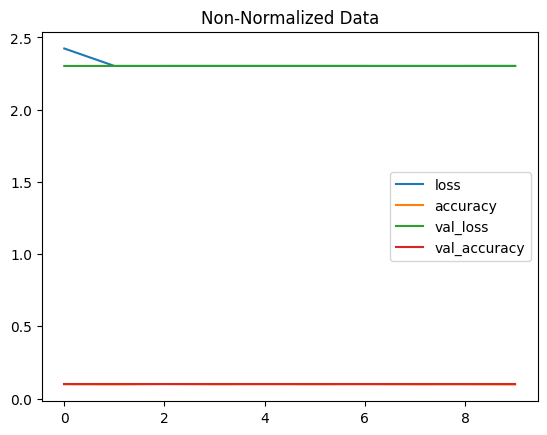

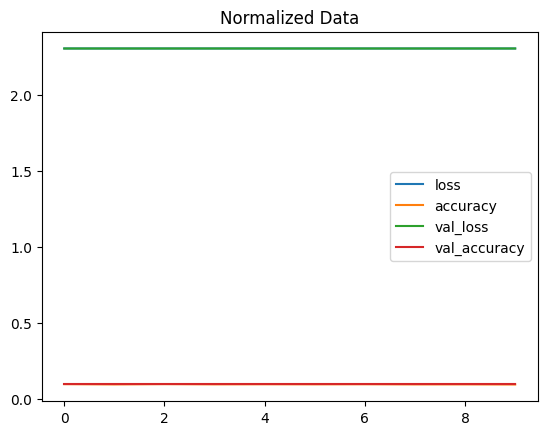

In [ ]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-Normalized Data")

# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

🔑**Note:** The same model with even *slightly* different data can produce *dramatically* different results. So when you are comparing models , it's important to make sure you're comparing them on the same criteria (e.g. same architecture but different data or same data with different architecture).

In [ ]:
## Finding the ideal learning rate
# To do that we need to create the model by first setting the random seed
tf.random.set_seed(69)
# Create the model
Grand_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
# Compiling the model
Grand_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])
# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# Fitting the model
find_lr_history = Grand_model_2.fit(train_data_norm, train_labels, epochs=40, validation_data = (test_data_norm, test_labels), callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.2153 - accuracy: 0.5720 - val_loss: 0.8565 - val_accuracy: 0.7103 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7370 - accuracy: 0.7238 - val_loss: 0.7057 - val_accuracy: 0.7467 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6681 - accuracy: 0.7610 - val_loss: 0.6887 - val_accuracy: 0.7556 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6277 - accuracy: 0.7800 - val_loss: 0.6497 - val_accuracy: 0.7743 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5979 - accuracy: 0.7921 - val_loss: 0.6377 - val_accuracy: 0.7780 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5807 - accuracy: 0.7986 - val_loss: 0.6268 - val_accuracy: 0.7798 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate ')

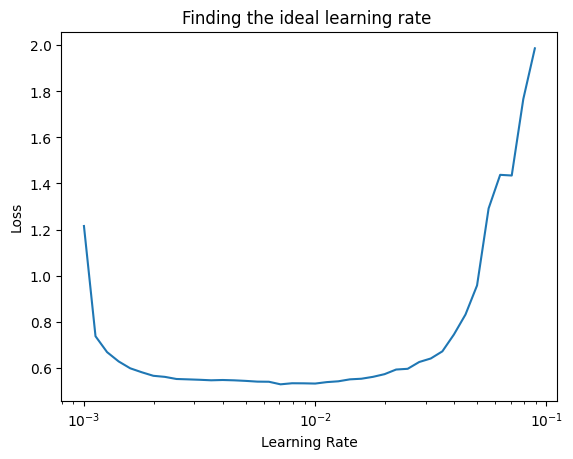

In [ ]:
# Plot the learning rate decay curves
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate ")

In [ ]:
# From here we can see that the ideal learning rate is around 0.001 , which is the default of Adam
# So , let's fit the model with the ideal learning rate for completeness
tf.random.set_seed(69)
# Creating the model
Grand_model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(4, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compiling the model
Grand_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                    metrics=["accuracy"])
# Fitting the model
history_3 = Grand_model_3.fit(train_data_norm, train_labels, epochs=20, validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 1.4506 - accuracy: 0.3873 - val_loss: 1.2152 - val_accuracy: 0.4959
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0582 - accuracy: 0.5973 - val_loss: 0.9596 - val_accuracy: 0.6331
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8846 - accuracy: 0.6558 - val_loss: 0.8535 - val_accuracy: 0.6716
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8009 - accuracy: 0.6898 - val_loss: 0.8052 - val_accuracy: 0.6865
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7654 - accuracy: 0.7001 - val_loss: 0.7811 - val_accuracy: 0.6973
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7416 - accuracy: 0.7088 - val_loss: 0.7715 - val_accuracy: 0.7093
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7225 - accuracy: 0.7225 - val_loss: 0.7512 - val_accuracy:

## Evaluating our multi-class classification model

To evaluate our multi-class classification model , we can use the following methods:
* Evaluate its performance using other classification metrics (such as a confusion matrix).
* Assess some of its predictions through visualization.
* Improve its results (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the top two...



In [ ]:
# Creating a function to make a confusion matrix
# This takes in true labels & predicted labels , and creates a confusion matrix depicting true/false negatives/positives
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):

  # Create the confusion Matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # Normalise our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)
  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set threshold for different colours
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

In [ ]:
# Make some predictions with our model
y_probs = Grand_model_3.predict(test_data_norm) # probs is short for 'prediction probabilities'

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 0s 1ms/step


array([[2.84276422e-12, 6.40121062e-16, 1.21165333e-09, 1.70900091e-06,
        1.10843404e-10, 3.09904665e-01, 3.60290582e-11, 1.40492290e-01,
        1.55950147e-05, 5.49585760e-01],
       [4.61310893e-03, 1.68133392e-05, 4.05347288e-01, 2.68969568e-03,
        4.59766239e-01, 1.65929680e-03, 8.11262280e-02, 1.44874200e-03,
        4.33056802e-02, 2.70056898e-05],
       [2.40274845e-03, 9.97424781e-01, 2.76540931e-16, 1.72383749e-04,
        1.42961512e-18, 2.92238678e-20, 6.73245921e-08, 0.00000000e+00,
        0.00000000e+00, 4.57084941e-23],
       [8.76619306e-05, 9.99715924e-01, 7.70618416e-18, 1.96390407e-04,
        5.17131709e-19, 6.64897341e-19, 1.50113666e-09, 0.00000000e+00,
        0.00000000e+00, 5.56784716e-23],
       [1.77943528e-01, 3.19580687e-03, 1.48432419e-01, 7.91014507e-02,
        8.17467123e-02, 3.79485544e-04, 5.09189665e-01, 3.88011358e-07,
        6.03346143e-06, 4.44175384e-06]], dtype=float32)

🔑**Note:** Remember to make predictions on the same kind of data your model was trained on (e.g. if your model was trained on normalized data , you'd want to make predictions on normalized data ')

In [ ]:
# Here we are checking the first prediction array form y_probs and finding what position is the highest prediction of the labels array
# From there , we are finding the corresponding class name related to the array , which gives us the most appropriate label name
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.84276422e-12, 6.40121062e-16, 1.21165333e-09, 1.70900091e-06,
        1.10843404e-10, 3.09904665e-01, 3.60290582e-11, 1.40492290e-01,
        1.55950147e-05, 5.49585760e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 4, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_preds)

array([[725,   4,   9,  61,  24,   3, 167,   0,   7,   0],
       [ 20, 933,   4,  29,   3,   0,   9,   0,   2,   0],
       [ 11,   0, 494,  14, 341,   0, 136,   0,   4,   0],
       [ 41,  24,  10, 771,  44,  13,  91,   0,   6,   0],
       [  3,   0, 280,  30, 579,   3,  92,   0,  13,   0],
       [  0,   0,   0,  15,   3, 825,   0,  57,  25,  75],
       [118,   0, 206,  38, 110,   0, 518,   0,  10,   0],
       [  0,   0,   0,   0,   0,  68,   0, 852,   7,  73],
       [  0,   0,   6,   8,  78,  12,   7,   9, 880,   0],
       [  0,   0,   1,   1,   0,  43,   0,  31,   0, 924]])

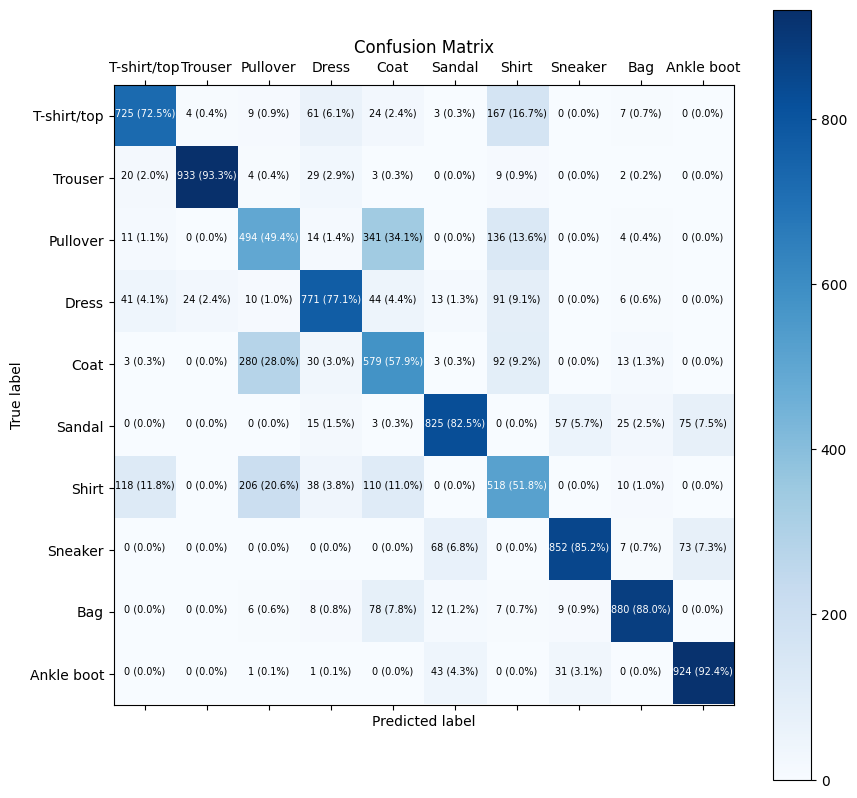

In [ ]:
# Make a prettier confusion matrix
make_confusion_matrix(test_labels, y_preds, classes=class_names, figsize=(10,10), text_size=7)

🔑**Note:** Often when working with images and other forms of visual data , it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs anfd outputs of your models.

How about we create a fun little function for :
* Plot a random image
* Make a prediction on a said image
* Label the plot with true and predicted labels

In [ ]:
import random
def plot_random_image(model, images, true_labels, classes):
  """
  Picks up a random image, plots it and labels it with a prediction and a truth label.
  """
  # Set up random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # model expects samples in batch format
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the colour to green or red if the prediction is right or wrong

1/1 [==============================] - 0s 31ms/step


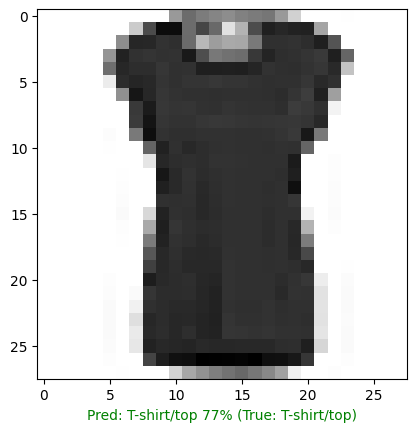

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(Grand_model_3, test_data_norm, test_labels, class_names)

## What patterns is our model learning ?

In [ ]:
# Find the layers of our most recent model
Grand_model_3.layers

In [ ]:
# Extract a particular layer
Grand_model_3.layers[1]

In [ ]:
# Get the patterns of a layer in our network
weights, biases = Grand_model_3.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[-0.0034811 ,  0.78299224, -0.5752191 ,  0.19687924],
        [-0.02100006,  0.71097124, -0.32785696,  0.5493842 ],
        [ 0.05853757,  0.7199421 , -1.1454674 ,  0.10691529],
        ...,
        [ 0.00419562,  0.51105297, -0.1011814 ,  0.22921331],
        [-0.00125767,  0.34137884,  0.6273522 ,  0.32105255],
        [ 0.07119475,  1.0233545 , -0.00534975,  0.6226578 ]],
       dtype=float32),
 (784, 4))

## Now let's check out the bias vector...

In [ ]:
# Bias and bias shape
biases, biases.shape

(array([-0.0362935,  2.3821323,  3.094374 ,  0.9532678], dtype=float32), (4,))

Every neuron has a bias vector. Each of this is paired with a weights matrix.

The bias vector gets initialized as zeros (atleast in the case of a Tensorflow Dense Layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

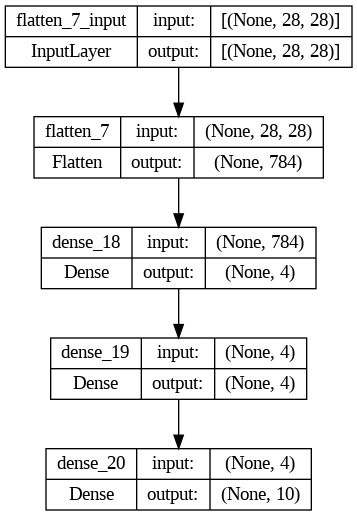

In [ ]:
# Let's check out another way of viewing our deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(Grand_model_3, show_shapes=True)

# **TensorFlow Exercises** for Practice

In [ ]:
tf.random.set_seed(69)
Test_model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(6, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
Test_model.compile(loss="binary_crossentropy",
                   optimizer="Adam",
                   metrics=["accuracy"])
input_shape=(None,26,26)
Test_model.build(input_shape)

In [ ]:
Test_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 26, 6)             162       
                                                                 
 dense_52 (Dense)            (None, 26, 6)             42        
                                                                 
 dense_53 (Dense)            (None, 26, 6)             42        
                                                                 
 dense_54 (Dense)            (None, 26, 6)             42        
                                                                 
 dense_55 (Dense)            (None, 26, 6)             42        
                                                                 
 dense_56 (Dense)            (None, 26, 1)             7         
                                                                 
Total params: 337 (1.32 KB)
Trainable params: 337 (1.

In [ ]:
# Creating a random dataset using the make_moons function from scikit-learn
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=5000, noise=0.2, random_state=69)
X.shape, y.shape

((5000, 2), (5000,))

In [ ]:
X[:10], y[:10]

(array([[ 1.29102516, -0.60026703],
        [-0.34511295,  0.20784115],
        [ 1.902213  , -0.34207518],
        [ 0.11892201,  0.3590435 ],
        [-0.12940779,  0.93221481],
        [-0.70969797,  0.70507987],
        [ 0.12400472,  0.85795419],
        [ 0.96226936,  0.56842624],
        [ 0.74134282, -0.3387879 ],
        [ 1.21325733,  0.27598507]]),
 array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0]))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 2), (1000, 2), (4000,), (1000,))

In [ ]:
# Building a model for our data
tf.random.set_seed(69)
# Creating the model
moon_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compiling the model
moon_model.compile(loss="binary_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                   metrics=["accuracy"])

# Fitting the model
moon_history = moon_model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test))

Epoch 1/10
125/125 [==============================] - 2s 5ms/step - loss: 0.4003 - accuracy: 0.8152 - val_loss: 0.2982 - val_accuracy: 0.8640
Epoch 2/10
125/125 [==============================] - 0s 4ms/step - loss: 0.2642 - accuracy: 0.8810 - val_loss: 0.2658 - val_accuracy: 0.8880
Epoch 3/10
125/125 [==============================] - 0s 3ms/step - loss: 0.2273 - accuracy: 0.9025 - val_loss: 0.2173 - val_accuracy: 0.9080
Epoch 4/10
125/125 [==============================] - 1s 4ms/step - loss: 0.1692 - accuracy: 0.9302 - val_loss: 0.1563 - val_accuracy: 0.9350
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9578 - val_loss: 0.1232 - val_accuracy: 0.9500
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9680 - val_loss: 0.1120 - val_accuracy: 0.9550
Epoch 7/10
125/125 [==============================] - 0s 2ms/step - loss: 0.0884 - accuracy: 0.9670 - val_loss: 0.1087 - val_accuracy: 0.9520
Epoch 

In [ ]:
# Importing the fashion mnist dataset
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
# Now we are extracting the training & test data from the dataset and loading it into seperate tuples
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
# Let's normalize the data
train_data_norm = train_data/255
test_data_norm = test_data/255
train_labels_norm = train_labels/255
test_labels_norm = test_labels/255
train_data_norm[0], test_data_norm[0]

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [ ]:
 tf.random.set_seed(69)
Max_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
Max_model.compile(loss="sparse_categorical_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

# Creating a learning rate callback ( Note that, this has to exist before fitting the model)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

Max_history = Max_model.fit(train_data_norm, train_labels_norm, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8675 - accuracy: 0.0767 - lr: 1.0000e-04
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0073 - accuracy: 0.1000 - lr: 1.1220e-04
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0015 - accuracy: 0.1000 - lr: 1.2589e-04
Epoch 4/100
1875/1875 [==============================] - 5s 3ms/step - loss: 4.0884e-04 - accuracy: 0.1000 - lr: 1.4125e-04
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2532e-04 - accuracy: 0.1000 - lr: 1.5849e-04
Epoch 6/100
1875/1875 [==============================] - 4s 2ms/step - loss: 3.9634e-05 - accuracy: 0.1000 - lr: 1.7783e-04
Epoch 7/100
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3227e-05 - accuracy: 0.1000 - lr: 1.9953e-04
Epoch 8/100
1875/1875 [==============================] - 4s 2ms/step - loss: 4.5661e-06 - accuracy: 0.1000 - lr: 2.2387e-04
Epoch 9/100
1875/187

In [ ]:
# Plot the learning rate versus the loss
import matplotlib.pyplot as plt
lrs = 1e-4 * (10**(tf.range(100)/20)) # This array depicts the learning rate of the model from start till the end of epoch
plt.figure(figsize=(10,7))
plt.semilogx(lrs, Max_history.history["loss"]) # This plots the learning rate on the x-axis and the loss on the y-axis
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

In [ ]:
tf.random.set_seed(69)
Max_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    #tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
Max_model.compile(loss="sparse_categorical_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=["accuracy"])
Max_history = Max_model.fit(train_data_norm, train_labels_norm, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0804 - accuracy: 0.0973
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0317e-04 - accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 4.8922e-05 - accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5515e-05 - accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4275e-06 - accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8988e-06 - accuracy: 0.1000
Epoch 7/10
1473/1875 [======================>.......] - ETA: 0s - loss: 8.4853e-07 - accuracy: 0.1009

KeyboardInterrupt: 